#### Install Libraries

In [ ]:
# !python -m pip install python-dotenv
# !python -m pip install llama-index
# !python -m pip install llama-index-embeddings-azure-openai
# !python -m pip install llama-index-llms-azure-openaia

In [ ]:
# !python -m pip install llama-index-multi-modal-llms-openai
# !python -m pip install llama-index-vector-stores-qdrant
# !python -m pip install llama_index ftfy regex tqdm
# !python -m pip install torch torchvision
# !python -m pip install matplotlib scikit-image
# !python -m pip install -U qdrant_client
# !python -m pip install llama-index-embeddings-clip
# !python -m pip install git+https://github.com/openai/CLIP.git


In [24]:
# !pip install Spire.PDF
# !python -m pip install -qU langchain_community pypdf

In [2]:
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

In [3]:
from llama_index.llms.azure_openai import AzureOpenAI
from llama_index.embeddings.azure_openai import AzureOpenAIEmbedding
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
import logging
import sys

logging.basicConfig(
    stream=sys.stdout, level=logging.INFO
)  # logging.DEBUG for more verbose output
logging.getLogger().addHandler(logging.StreamHandler(stream=sys.stdout))

In [4]:
import os
from dotenv import load_dotenv
from llama_index.llms.azure_openai import AzureOpenAI
from llama_index.embeddings.azure_openai import AzureOpenAIEmbedding
load_dotenv()

azure_endpoint = os.environ["AZURE_ENBOT_ENDPOINT"]
azure_openai_api_key = os.environ["AZURE_ENBOT_API_KEY"]
azure_openai_api_version = os.environ["AZURE_ENBOT_API_VERSION"]
azure_deployment = os.environ["AZURE_ENBOT_EMBEDDINGS_DEPLOYMENT_NAME"]
embed_model = AzureOpenAIEmbedding(
    deployment_name=azure_deployment,
    api_version=azure_openai_api_version,
    azure_endpoint=azure_endpoint,
    api_key=azure_openai_api_key,
)

azure_endpoint = os.environ["AZURE_ENBOT_ENDPOINT"]
azure_openai_api_key = os.environ["AZURE_ENBOT_API_KEY"]
azure_openai_api_version = os.environ["AZURE_ENBOT_API_VERSION"]
azure_deployment = os.environ["AZURE_ENBOT_EMBEDDINGS_DEPLOYMENT_NAME"]
llm = AzureOpenAI(
    api_key= os.getenv("AZURE_ENBOT_API_KEY"),
    api_version= os.environ["AZURE_ENBOT_API_VERSION"],
    deployment_name= os.environ["AZURE_ENBOT_LLM_DEPLOYMENT_NAME"],
    azure_endpoint=os.environ["AZURE_ENBOT_ENDPOINT"],
    temperature= 0.6,
    max_tokens = 4096
)
# response = llm.complete("Hi").text
# print(response)
# embedding = embed_model.get_text_embedding("hello world")
# print(embedding)

python-dotenv could not parse statement starting at line 1


In [5]:
from llama_index.core import Settings

Settings.llm = llm
Settings.embed_model = embed_model

#### Extracting images in pdf

In [19]:
import fitz  # PyMuPDF
import os
import shutil

def extract_images_from_pdf(pdf_path, output_folder):
    # Remove the output folder if it exists, then recreate it
    if os.path.exists(output_folder):
        shutil.rmtree(output_folder)
    os.makedirs(output_folder)

    # Open the PDF file
    doc = fitz.open(pdf_path)
    image_count = 0

    # Iterate through pages
    for page_number in range(len(doc)):  # Page count starts from 0
        page = doc[page_number]
        images = page.get_images(full=True)

        print(f"Page {page_number}: {len(images)} images found")  # Print image count per page

        for img_index, img in enumerate(images):
            xref = img[0]  # Image reference number
            base_image = doc.extract_image(xref)
            image_bytes = base_image["image"]
            image_ext = base_image["ext"]  # Image extension (e.g., png, jpeg)

            # Save the image
            image_filename = os.path.join(output_folder, f"image_{page_number}_{img_index+1}.{image_ext}")
            with open(image_filename, "wb") as img_file:
                img_file.write(image_bytes)

            image_count += 1

    print(f"Extraction complete. {image_count} images saved to {output_folder}.")


# Example usage
pdf_path = r"C:\Codes\01_Personal\00_Multimodels\pdfs\minion-tech.pdf"
output_folder = "extracted_data"
extract_images_from_pdf(pdf_path, output_folder)


Page 0: 1 images found
Page 1: 0 images found
Page 2: 0 images found
Page 3: 0 images found
Page 4: 1 images found
Page 5: 0 images found
Page 6: 1 images found
Page 7: 0 images found
Page 8: 1 images found
Page 9: 0 images found
Page 10: 0 images found
Page 11: 0 images found
Page 12: 0 images found
Page 13: 1 images found
Page 14: 0 images found
Page 15: 0 images found
Page 16: 0 images found
Page 17: 1 images found
Page 18: 0 images found
Page 19: 1 images found
Page 20: 1 images found
Page 21: 1 images found
Extraction complete. 9 images saved to extracted_data.


#### Extracing Text and Tables in PDF

In [29]:
import os
from langchain_community.document_loaders import PyPDFLoader

def extract_and_save_pdf_pages(pdf_path, output_dir):
    # Load and split PDF pages
    loader = PyPDFLoader(pdf_path)
    docs = loader.load_and_split()
    
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    texts = []

    # Save each page to a .txt file and collect the content
    for i, doc in enumerate(docs):
        text = doc.page_content
        texts.append(text)

        filename = f"Page-{i + 1}.txt"
        filepath = os.path.join(output_dir, filename)
        
        with open(filepath, "w", encoding="utf-8") as f:
            f.write(text)

    print(f"Saved {len(texts)} pages to '{output_dir}' folder.")
    return texts

texts =  extract_and_save_pdf_pages(pdf_path, output_folder)
len(texts)


Saved 22 pages to 'extracted_data' folder.


22

#### Plot Images

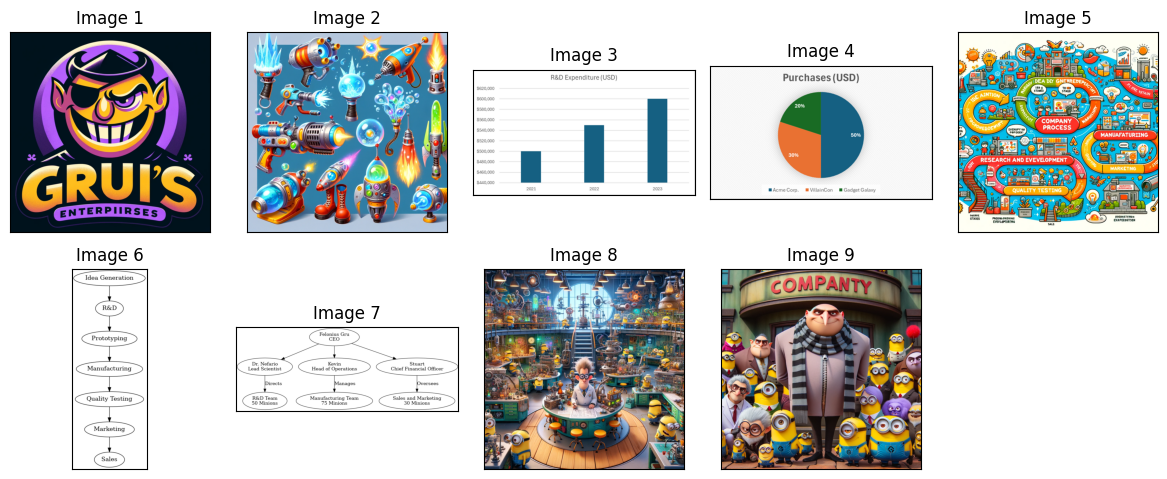

In [10]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import glob

# Get all .png file paths
folder_path = output_folder
image_paths = glob.glob(f"{folder_path}/*.png")

def plot_images_from_image_path(image_paths):
    images_shown = 0
    plt.figure(figsize=(12, 12))  # Adjusted for better layout

    for img_path in image_paths:
        if os.path.isfile(img_path):
            with Image.open(img_path) as image:  # Ensures proper closing
                plt.subplot(5, 5, images_shown + 1)  # Adjusted for up to 9 images
                plt.imshow(image)
                plt.xticks([])
                plt.yticks([])
                plt.title(f"Image {images_shown + 1}")  # Optional: Add titles

                images_shown += 1
                if images_shown >= 9:
                    break

    plt.tight_layout()
    plt.show()  # Ensure the images are displayed

plot_images_from_image_path(image_paths)


#### Use Clip and LLamaindex

In [11]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.core import SimpleDirectoryReader, StorageContext

import qdrant_client
from llama_index.core import SimpleDirectoryReader


# Create a local Qdrant vector store
client = qdrant_client.QdrantClient(path="qdrant_db")

# in llamaindex backend Azure embedding ada is used here for text embeddings and then store it in Vector DB
text_store = QdrantVectorStore(
    client=client, collection_name="text_collection"
)
# in llamaindex backend Clip is used here for image embeddings and then store it in Vector DB
image_store = QdrantVectorStore(
    client=client, collection_name="image_collection"
)
storage_context = StorageContext.from_defaults(
    vector_store=text_store,
    image_store=image_store
)

In [12]:
documents = SimpleDirectoryReader(output_folder).load_data()
print(len(documents), documents)  # page by page chunking

31 [ImageDocument(id_='d8120a01-c6d9-4682-9ca9-966fc8378688', embedding=None, metadata={'file_path': 'c:\\Codes\\01_Personal\\00_Multimodels\\tutorials\\LLamaIndex_Pdf_text_and_image\\extracted_data\\image_0_1.png', 'file_name': 'image_0_1.png', 'file_type': 'image/png', 'file_size': 1118258, 'creation_date': '2025-04-07', 'last_modified_date': '2025-04-07'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text='', path=None, url=None, mimetype=None), image_resource=MediaResource(embeddings=None, data=None, text=None, path=WindowsPath('c:/Codes/01_Personal/00_Multimodels/tutorials/LLamaIndex_Pdf_text_and_image/extracted_data/image_0_1.png'), url

In [13]:
## indexing
index = MultiModalVectorStoreIndex.from_documents(
    documents,
    storage_context=storage_context,
)

INFO:httpx:HTTP Request: POST https://enbotsandbox.openai.azure.com/openai/deployments/text-embedding-3-large/embeddings?api-version=2024-08-01-preview "HTTP/1.1 200 OK"
HTTP Request: POST https://enbotsandbox.openai.azure.com/openai/deployments/text-embedding-3-large/embeddings?api-version=2024-08-01-preview "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://enbotsandbox.openai.azure.com/openai/deployments/text-embedding-3-large/embeddings?api-version=2024-08-01-preview "HTTP/1.1 200 OK"
HTTP Request: POST https://enbotsandbox.openai.azure.com/openai/deployments/text-embedding-3-large/embeddings?api-version=2024-08-01-preview "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://enbotsandbox.openai.azure.com/openai/deployments/text-embedding-3-large/embeddings?api-version=2024-08-01-preview "HTTP/1.1 200 OK"
HTTP Request: POST https://enbotsandbox.openai.azure.com/openai/deployments/text-embedding-3-large/embeddings?api-version=2024-08-01-preview "HTTP/1.1 200 OK"


#### Retriver 

INFO:httpx:HTTP Request: POST https://enbotsandbox.openai.azure.com/openai/deployments/text-embedding-3-large/embeddings?api-version=2024-08-01-preview "HTTP/1.1 200 OK"
HTTP Request: POST https://enbotsandbox.openai.azure.com/openai/deployments/text-embedding-3-large/embeddings?api-version=2024-08-01-preview "HTTP/1.1 200 OK"


**Node ID:** 0a654ea5-f361-4cba-8479-604b29996b76<br>**Similarity:** 0.531807318933005<br>**Text:** minion-tech.md
2024-01-06
22 / 22
Process Flow Diagrams: Illustrations of our manufacturing and development processes.<br>

**Node ID:** b13c6ebd-51dc-4f92-a6e8-e96d3cf953d9<br>**Similarity:** 0.30278349095598667<br>**Text:** minion-tech.md
2024-01-06
3 / 22
Cash Flow Statement
Tables
R&D Costs
Best-selling Products Analysis
Top Clients and Purchases
Geographical Distribution of Product Use
Infographics and Dia...<br>

**Node ID:** 64210253-0c5c-4817-b310-486403150bbd<br>**Similarity:** 0.2686693079729785<br>**Text:** minion-tech.md
2024-01-06
10 / 22
6. Operational Overview
Manufacturing Process
Our manufacturing process is streamlined for efficiency and innovation. The workflow is divided into several
st...<br>

**Node ID:** 62c416ad-062b-4feb-b23c-19b6efc8bc54<br>**Similarity:** 0.24270712121706275<br>**Text:** minion-tech.md
2024-01-06
16 / 22
2. Cash Flow Statement
Outlines the cash inflows and outflows over the fiscal year.
Cash Flow Statement
Description
Amount (USD)
Operating Activities
Net ...<br>

**Node ID:** 1a6b6658-2fe9-4dcd-99d4-f627f51422ea<br>**Similarity:** 0.22516321867952105<br>**Text:** minion-tech.md
2024-01-06
20 / 22
Top Clients and Purchases
Geographical Distribution of Product Use
Region
Sales (USD)
North America
$1,000,000
Europe
$800,000
Asia
$600,000
Rest of t...<br>

5 ['c:\\Codes\\01_Personal\\00_Multimodels\\tutorials\\LLamaIndex_Pdf_text_and_image\\extracted_data\\image_4_1.png', 'c:\\Codes\\01_Personal\\00_Multimodels\\tutorials\\LLamaIndex_Pdf_text_and_image\\extracted_data\\image_21_1.png', 'c:\\Codes\\01_Personal\\00_Multimodels\\tutorials\\LLamaIndex_Pdf_text_and_image\\extracted_data\\image_20_1.png', 'c:\\Codes\\01_Personal\\00_Multimodels\\tutorials\\LLamaIndex_Pdf_text_and_image\\extracted_data\\image_6_1.png', 'c:\\Codes\\01_Personal\\00_Multimodels\\tutorials\\LLamaIndex_Pdf_text_and_image\\extracted_data\\image_13_1.png']


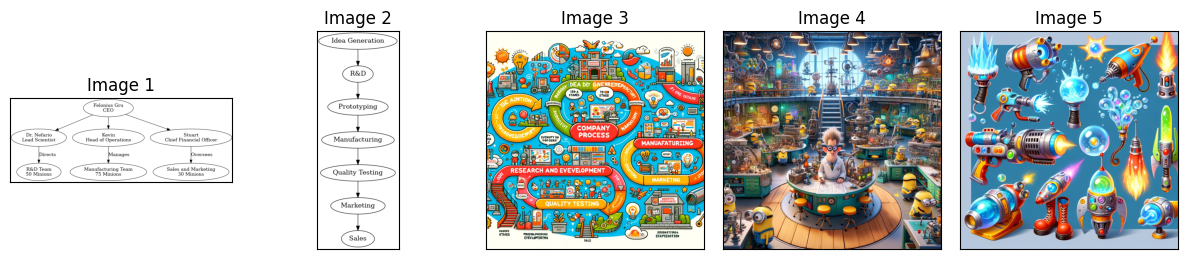

5 ['minion-tech.md\r\n2024-01-06\r\n22 / 22\r\nProcess Flow Diagrams: Illustrations of our manufacturing and development processes.', 'minion-tech.md\r\n2024-01-06\r\n3 / 22\r\nCash Flow Statement\r\nTables\r\nR&D Costs\r\nBest-selling Products Analysis\r\nTop Clients and Purchases\r\nGeographical Distribution of Product Use\r\nInfographics and Diagrams\r\nOrganizational Chart\r\nProcess Flow Diagrams\r\nImages\r\nR&D Lab\r\nCompany Group Photo\r\nClose-ups of Cartoon Weapons', 'minion-tech.md\r\n2024-01-06\r\n10 / 22\r\n6. Operational Overview\r\nManufacturing Process\r\nOur manufacturing process is streamlined for efficiency and innovation. The workflow is divided into several\r\nstages:\r\n1. Design and Prototyping: Led by Dr. Nefario and his team, this stage involves brainstorming, sketching,\r\nand creating prototypes.\r\n2. Material Sourcing: We source high-quality, durable materials, ensuring our products are safe and\r\nlong-lasting.\r\n3. Assembly: Minions handle the assembly 

In [14]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

def retriever(query_str):
    retriever_engine = index.as_retriever(
    similarity_top_k=5, image_similarity_top_k=5
    )
    retrieval_results = retriever_engine.retrieve(query_str)

    retrieved_image = []
    retrieved_text = []
    for res_node in retrieval_results:
        if isinstance(res_node.node, ImageNode):
            retrieved_image.append(res_node.node.metadata["file_path"])
        else:
            display_source_node(res_node, source_length=200)
            retrieved_text.append(res_node.text)

    return retrieved_image, retrieved_text

query="Process Flow Diagram?"
retrieved_image, retrieved_text = retriever(query)
print(len(retrieved_image), retrieved_image)
plot_images_from_image_path(retrieved_image)
print(len(retrieved_text), retrieved_text)

In [15]:
def index_image_paths(image_paths, start_index=0):
    """
    Creates a dictionary mapping image indices to their file paths.

    Args:
        image_paths (list[str]): List of image file paths.
        start_index (int): Starting index for mapping (default is 1).

    Returns:
        dict[int, str]: Dictionary mapping index to file path.
    """
    return {index: path for index, path in enumerate(image_paths, start=start_index)}




#### LLM Pipeline

INFO:httpx:HTTP Request: POST https://enbotsandbox.openai.azure.com/openai/deployments/text-embedding-3-large/embeddings?api-version=2024-08-01-preview "HTTP/1.1 200 OK"
HTTP Request: POST https://enbotsandbox.openai.azure.com/openai/deployments/text-embedding-3-large/embeddings?api-version=2024-08-01-preview "HTTP/1.1 200 OK"


**Node ID:** 9411b2c2-fd2a-4c0a-a3a4-3e0135c66daf<br>**Similarity:** 0.5046063208169979<br>**Text:** minion-tech.md
2024-01-06
18 / 22
Tables
R&D Costs: Breakdown of annual research and development expenses.
Best-selling Products Analysis: Costs, sales, profits, and margins of our top product...<br>

**Node ID:** 6e9b1733-f809-4153-920c-076956a77bc9<br>**Similarity:** 0.389232128891743<br>**Text:** minion-tech.md
2024-01-06
13 / 22
9. Investment Appeal
Investment Needs
To achieve our next phase of growth and innovation, we are seeking an investment of $2 million. These funds
will be all...<br>

**Node ID:** b13c6ebd-51dc-4f92-a6e8-e96d3cf953d9<br>**Similarity:** 0.3839201834386006<br>**Text:** minion-tech.md
2024-01-06
3 / 22
Cash Flow Statement
Tables
R&D Costs
Best-selling Products Analysis
Top Clients and Purchases
Geographical Distribution of Product Use
Infographics and Dia...<br>

**Node ID:** 88513b5f-329e-42e4-b7b4-d7c49f20b3bb<br>**Similarity:** 0.3774762946692801<br>**Text:** minion-tech.md
2024-01-06
17 / 22
3. Profit and Loss Statement
Outlines the profit and loss over the fiscal year.
Profit and Loss Statement for the Year 2023
Description
Amount (USD)
Revenu...<br>

**Node ID:** 4e166bdc-3de5-4f90-acc2-bd49207f9e32<br>**Similarity:** 0.36380760491156156<br>**Text:** minion-tech.md
2024-01-06
8 / 22
4. Market Analysis
Target Market and Clientele
Our products appeal to a wide range of customers, from children and families looking for fun gadgets to
hobbyis...<br>

INFO:httpx:HTTP Request: POST https://enbotsandbox.openai.azure.com/openai/deployments/gpt-4o/chat/completions?api-version=2024-08-01-preview "HTTP/1.1 200 OK"
HTTP Request: POST https://enbotsandbox.openai.azure.com/openai/deployments/gpt-4o/chat/completions?api-version=2024-08-01-preview "HTTP/1.1 200 OK"



Answer: 
"The R&D costs for Minion Tech are detailed in the financial documents. For the year 2023, the R&D expenses amounted to $600,000 as part of the operating expenses, as mentioned in the profit and loss statement. Additionally, the investment appeal document outlines a plan to allocate $800,000 for R&D expansion from a requested $2 million investment to develop new product lines and enhance existing products."


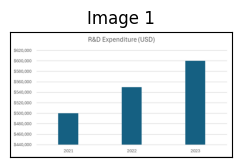

{'answer': 'The R&D costs for Minion Tech are detailed in the financial documents. For the year 2023, the R&D expenses amounted to $600,000 as part of the operating expenses, as mentioned in the profit and loss statement. Additionally, the investment appeal document outlines a plan to allocate $800,000 for R&D expansion from a requested $2 million investment to develop new product lines and enhance existing products.',
 'image_index': [0]}

In [18]:
import base64
import os
from llama_index.core.schema import Document, MediaResource
from llama_index.core.llms import (
    ChatMessage,
    ImageBlock,
    TextBlock,
    MessageRole,
)
import json
import re 

def analyze_images_with_query(query):
    
    retrieved_image, retrieved_text = retriever(query)
    indexed_retrieved_text = index_image_paths(retrieved_image, start_index=0)
    
    # Convert image paths to Document objects
    image_documents = []
    for image_path in retrieved_image:
        if not os.path.exists(image_path):
            print(f"Error: File not found {image_path}")
            continue

        with open(image_path, "rb") as image_file:
            img_data = base64.b64encode(image_file.read())

        image_document = Document(image_resource=MediaResource(data=img_data))
        image_documents.append(image_document)

    # Build the system prompt
    text_message = f"""You are an AI assistant analyzing a mix of text and image data.
Your task is to:
1. Answer the users question based on the provided text and images.
2. Identify which image (if any) is most relevant to the question and return its index.

User question:
{query}

Context documents:
{retrieved_text}

Expected Output Format (JSON):
{{
    answer: str = Field(description="Answer to user query.")
    image_index: list[int] = Field(description="index of the most relevant image or -1 if none")
}}

Answer:
"""

    # Build message blocks
    blocks = [TextBlock(text=text_message)]

    for index, doc in enumerate(image_documents):
        blocks.append(TextBlock(text=f"Image Index {index}:"))
        blocks.append(ImageBlock(image=doc.image_resource.data))

    # Create and send the message
    msg = ChatMessage(role=MessageRole.USER, blocks=blocks)
    response = llm.chat(messages=[msg])

    ### Final response
    result = re.sub(r"json|```", "", response.message.content)
    result = json.loads(result)
    print("\n\n\n","="*100)
    print("Answer: ")
    print(json.dumps(result["answer"], indent=2))
    image_paths_from_LLM =[indexed_retrieved_text[indexes] for indexes in result["image_index"]]
    # print(image_paths_from_LLM)
    plot_images_from_image_path(image_paths_from_LLM)
    print("\n","="*100,"\n\n\n")
    
    return result

query ="Give me R&D Costs? In detail?"
analyze_images_with_query(query)
